In [4]:
## build researcher events, student events, and self-study events
## researcher are simply those with NH citations

In [5]:
import sys

import pandas as pd
import numpy as np
import time
import datetime
import os
from nanoHUB.application import Application
from nanoHUB.configuration import ClusteringConfiguration
from nanoHUB.pipeline.geddes.data import get_default_s3_client
from nanoHUB.dataaccess.lake import S3FileMapper

from nanoHUB.clustering.infra import get_mike_only_clustered_users, get_xufeng_only_clustered_users, get_mike_xufeng_clustered_users
from nanoHUB.clustering.infra import create_clusters_repository, add_cluster_info, get_all_clustered_users, get_all_self_study_users, get_all_self_identified_users

nanoHUB - Serving Students, Researchers & Instructors


In [6]:
pd.set_option('display.max_columns', None)
cwd = os.getcwd()

In [7]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#start_year_base = 2019 #2000
pathsave=cwd+'/cached_data/'
pathsave=cwd+'/test_data/'
pathsave=cwd+'/AnnualReport2022_data/'



In [8]:
application = Application.get_instance()
nanohub_db = application.new_db_engine('nanohub')
nanohub_metrics_db = application.new_db_engine('nanohub_metrics')
wang159_myrmekes_db = application.new_db_engine('rfm_data')

s3_client = get_default_s3_client(application)
derived_data_file_path = 'derived_data_for_users.csv'
processed_mapper = S3FileMapper(s3_client, ClusteringConfiguration().bucket_name_processed)

## Cumulative classroom/research/self-study

In [9]:
today = datetime.datetime.today()
print(today)

2022-02-23 16:52:46.502877


In [10]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#else:
#     print('check the saved file')
#    start_year_base = int(user_breakdown_df['year_month'].to_list()[-1][:4])
    
    

In [11]:
from copy import deepcopy

In [12]:
cache_flag = False
all_months_list = list()
for this_year in range(start_year_base+1,today.year+2):
    if cache_flag == True:
        for this_month in range(1,today.month+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))
    else:
        for this_month in range(1,12+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))

cache_all_month_list = pd.DataFrame()
cache_all_month_list['Date'] = all_months_list
cache_all_month_list.to_csv(cwd+'/cached_data/all_months_list.csv')
cache_all_month_list.to_csv(cwd+'/cached_data/'+ str(start_year_base)+'_all_months_list.csv')
cache_all_month_list = []
print('allmonths partial list',all_months_list[0:36])


allmonths partial list [datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2000, 2, 1, 0, 0), datetime.datetime(2000, 3, 1, 0, 0), datetime.datetime(2000, 4, 1, 0, 0), datetime.datetime(2000, 5, 1, 0, 0), datetime.datetime(2000, 6, 1, 0, 0), datetime.datetime(2000, 7, 1, 0, 0), datetime.datetime(2000, 8, 1, 0, 0), datetime.datetime(2000, 9, 1, 0, 0), datetime.datetime(2000, 10, 1, 0, 0), datetime.datetime(2000, 11, 1, 0, 0), datetime.datetime(2000, 12, 1, 0, 0), datetime.datetime(2001, 1, 1, 0, 0), datetime.datetime(2001, 2, 1, 0, 0), datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 4, 1, 0, 0), datetime.datetime(2001, 5, 1, 0, 0), datetime.datetime(2001, 6, 1, 0, 0), datetime.datetime(2001, 7, 1, 0, 0), datetime.datetime(2001, 8, 1, 0, 0), datetime.datetime(2001, 9, 1, 0, 0), datetime.datetime(2001, 10, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0), datetime.datetime(2001, 12, 1, 0, 0), datetime.datetime(2002, 1, 1, 0, 0), datetime.datetime(2002, 2, 1, 0, 0), datetime

In [13]:
# clustered_NH_username2;researcher_NH_username2;self_NH_username2
clustered_track = []
clustered_m_track = []
clustered_x_track = []
clustered_mx_track = []
self2_track = []

# clustered_track_per = []
# self_track_per = []
# researcher_track_per = []

In [14]:

self_identified_track_df = pd.read_csv(pathsave+'selfidentifiedauthors_track.csv',usecols=['track'])
self_identified_track = self_identified_track_df['track'].tolist()
#print('self_identified_track[0:30]',self_identified_track[0:30])
print('len(self_identified_track)',len(self_identified_track))

researcher_track_df = pd.read_csv(pathsave+'citingauthor_track.csv',usecols=['track'])
researcher_track = researcher_track_df['track'].tolist()
#print('researcher_track[0:30]',researcher_track[0:30])
print('len(researcher_track)',len(researcher_track))

self2_track_df = pd.read_csv(pathsave+'unclassified_track.csv',usecols=['track'])
self2_track = self2_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(self2_track)',len(self2_track))

simtotal_track_df = pd.read_csv(pathsave+'simtotal_track.csv',usecols=['track'])
simtotal_track = simtotal_track_df['track'].tolist()
#print('simtotal_track[0:30]',simtotal_track[0:30])
print('len(simtotal_track)',len(simtotal_track))

clustered_track_df = pd.read_csv(pathsave+'clustered_all_track.csv',usecols=['track'])
clustered_track = clustered_track_df['track'].tolist()
#print('clustered_track[0:30]',clustered_track[0:30])
print('len(clustered_track)',len(clustered_track))

clustered_m_track_df = pd.read_csv(pathsave+'clustered_m_track.csv',usecols=['track'])
clustered_m_track = clustered_m_track_df['track'].tolist()
#print('clustered_m_track[0:30]',clustered_m_track[0:30])
print('len(clustered_m_track)',len(clustered_m_track))

clustered_x_track_df = pd.read_csv(pathsave+'clustered_x_track.csv',usecols=['track'])
clustered_x_track = clustered_x_track_df['track'].tolist()
#print('clustered_x_track[0:30]',clustered_x_track[0:30])
print('len(clustered_x_track)',len(clustered_x_track))

clustered_mx_track_df = pd.read_csv(pathsave+'clustered_mx_track.csv',usecols=['track'])
clustered_mx_track = clustered_x_track_df['track'].tolist()
print('clustered_mx_track[0:30]',clustered_mx_track[0:30])
print('len(clustered_mx_track)',len(clustered_mx_track))





len(self_identified_track) 288
len(researcher_track) 288
len(self2_track) 288
len(simtotal_track) 288
len(clustered_track) 288
len(clustered_m_track) 288
len(clustered_x_track) 288
clustered_mx_track[0:30] [0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]
len(clustered_mx_track) 288


In [15]:
#just for testing until all data is assembled, let's trim the lists to a smaller value 
if (0):
    listlength=288
    self_identified_track=self_identified_track[:listlength]
    researcher_track=researcher_track[:listlength]
    self2_track=self2_track[:listlength]
    simtotal_track=simtotal_track[:listlength]
    clustered_track=clustered_track[:listlength]
    clustered_m_track=clustered_m_track[:listlength]
    clustered_x_track=clustered_x_track[:listlength]
    clustered_mx_track=clustered_mx_track[:listlength]
    all_months_list=all_months_list[:listlength]

    print('simtotal_track ',simtotal_track[0:100])

In [16]:
user_breakdown_df2 = pd.DataFrame()
user_breakdown_df2['year_month'] = all_months_list
user_breakdown_df2['simtotal_track'] = simtotal_track
user_breakdown_df2['clustered_track'] = clustered_track
user_breakdown_df2['clustered_m_track'] = clustered_m_track
user_breakdown_df2['clustered_x_track'] = clustered_x_track
user_breakdown_df2['clustered_mx_track'] = clustered_mx_track
user_breakdown_df2['self_identified_track'] = self_identified_track
user_breakdown_df2['self_track'] = self2_track
user_breakdown_df2['researcher_track'] = researcher_track
display(user_breakdown_df2.tail(5))

,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track
283,2023-08-01,0,0,0,0,0,0,0,0
284,2023-09-01,0,0,0,0,0,0,0,0
285,2023-10-01,0,0,0,0,0,0,0,0
286,2023-11-01,0,0,0,0,0,0,0,0
287,2023-12-01,0,0,0,0,0,0,0,0


In [17]:
# user_breakdown_df.to_csv(cwd+'/cached_data/temp.csv')

In [18]:
import re

In [19]:
## read the dev_flags.txt to determine where to save
with open(cwd+'/dev_flags.txt','r') as f:
    raw_flags = f.read()
flag_pattern = re.compile(r'= \w+')
flags1 = re.findall(flag_pattern,raw_flags)    
flags_result = [i[2:] for i in flags1]
dev_flag = flags_result[0]
prod_flag = flags_result[1]

[WARNING] [warnings - py.warnings]: /tmp/ipykernel_19408/465986720.py:23: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


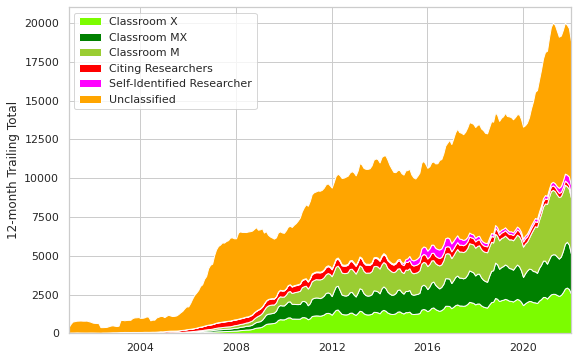

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_track','self_track']].to_numpy().T, \
#              labels=['Classroom', 'Unclassified'], \
#              colors=['green', 'orange']); #Self-study              
              user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_track']].to_numpy().T, \
             labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','Unclassified'], \
             colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('12-month Trailing Total')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_GK.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_GK.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [26]:
display(user_breakdown_df2[255:265]) 

,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,all_researchers,clustered_track_per,self_identified_track_per,researcher_track_per,self_track_per,all_researchers_per
255,2021-04-01,23758,13255,4149,2546,2546,230,10254,290,520,55.162512,0.957177,1.206875,42.673436,2.164052
256,2021-05-01,23379,12925,4072,2541,2541,236,10202,279,515,54.669656,0.998224,1.180103,43.152018,2.178327
257,2021-06-01,23072,12797,3995,2473,2473,268,10003,276,544,54.819225,1.148047,1.182317,42.850411,2.330363
258,2021-07-01,22587,12540,3963,2407,2407,322,9738,276,598,54.817276,1.407589,1.206505,42.568631,2.614093
259,2021-08-01,22616,12579,3886,2475,2475,377,9698,273,650,54.865442,1.644349,1.190736,42.299472,2.835085
260,2021-09-01,23017,12944,3847,2656,2656,414,9712,273,687,55.451313,1.773551,1.169515,41.605621,2.943066
261,2021-10-01,23463,13359,3807,2883,2883,447,9722,269,716,56.137328,1.878388,1.130395,40.853889,3.008783
262,2021-11-01,23017,12952,3584,2949,2949,490,9652,253,743,55.476078,2.098771,1.083651,41.341500,3.182422
263,2021-12-01,23054,13058,3595,2856,2856,542,9559,255,797,55.770052,2.314854,1.089092,40.826002,3.403946
264,2022-01-01,22300,12573,3604,2578,2578,565,9273,259,824,55.460962,2.492281,1.142479,40.904279,3.634760


In [21]:
total = user_breakdown_df2['clustered_track'].to_numpy()+\
        user_breakdown_df2['self_track'].to_numpy() +\
        user_breakdown_df2['researcher_track'].to_numpy()+\
        user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total ',total)

total_research = user_breakdown_df2['researcher_track'].to_numpy()+\
                 user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total_research ',total_research)
user_breakdown_df2['all_researchers'] = np.add(user_breakdown_df2['self_identified_track'], user_breakdown_df2['researcher_track'])
#user_breakdown_df2['all_researchers'] = user_breakdown_df2[['researcher_track','self_identified_track']].sum
display(user_breakdown_df2['all_researchers'].tolist()[200:205])
display(user_breakdown_df2['researcher_track'].tolist()[200:205])
display(user_breakdown_df2['self_identified_track'].tolist()[200:205])

user_breakdown_df2['clustered_track_per'] = 100*np.divide(user_breakdown_df2['clustered_track'],total)
user_breakdown_df2['self_identified_track_per'] = 100*np.divide(user_breakdown_df2['self_identified_track'], total)
user_breakdown_df2['researcher_track_per'] = 100*np.divide(user_breakdown_df2['researcher_track'], total)
user_breakdown_df2['self_track_per'] = 100*np.divide(user_breakdown_df2['self_track'], total)
user_breakdown_df2['all_researchers_per'] = 100*np.divide(user_breakdown_df2['all_researchers'], total)

[1033, 1006, 1014, 991, 955]

[468, 449, 449, 451, 441]

[565, 557, 565, 540, 514]

[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


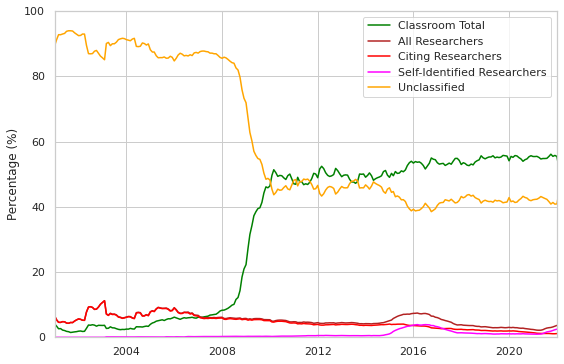

In [22]:
plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
             color='green');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
             color='firebrick');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
             color='red');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
             color='magenta');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_track_per, label='Unclassified', \
             color='orange');

plt.ylim([0, 100])
plt.legend(loc='upper right');
plt.ylabel('Percentage (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_class_res_unclass_12months_percent_copied.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_class_res_unclass_12months_percent_copied.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [23]:
user_breakdown_df2.to_csv(pathsave+'nh_user_breakdown.csv')